# Projet fin de semestre informatique
## Entrainement réseau de neurones sur le dataset Cifar10

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from keras.datasets import cifar10


(x_train, y_train), (x_test, y_test) = cifar10.load_data()



In [2]:
#Importation des notre document
from NN_dataset import *


### Comprehension des données 

Regardons les dimensions du dataset que nous venons de télécharger. Nous utilisons la commande ".shape" du module pandas qui renvoie un tuple avec les dimensions des données.


In [3]:
x_train.shape


(50000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

In [5]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [6]:
x_test.shape

(10000, 32, 32, 3)

In [7]:
y_test.shape

(10000, 1)

On obtient donc 4 variables: 
- x_train : c'est un numpy array de 50.000 images chacune composées de 32x32 pixels, chacun contenant 3 données (RGB)
- y_train : Représente les catégories associées à chaque image. C'est donc une liste de 50.000 valeurs comprises entre 0 et 9
- x_test : c'est un numpy array de 10.000 images chacune composées de 32x32 pixels, chacun contenant 3 données (RGB)
- y_test : Représente les catégories associées à chaque image. C'est donc une liste de 10.000 valeurs comprises entre 0 et 9

Il y a 10 catégories: airplane, automobile, bird, cat deer, dog, frog, horse, ship et truck

### Visualization des données 

Regardons à quoi ressemble les données téléchargées. Nous choisissons aléatoirement un nombre et nous regardons à quelle photo, indice et catégorie lui correspond.

1
automobile


/var/folders/4y/tytpgp396q94l9j_r7qwzqq00000gn/T/ipykernel_94678/2578263269.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  number = int(y_train[index])


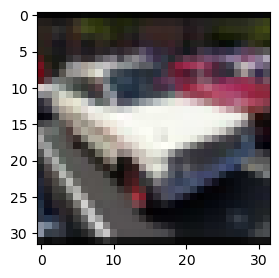

In [8]:

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(3, 5))
index = np.random.randint(len(x_train))
img = x_train[index]
plt.imshow(img)
number = int(y_train[index])
print(number)
category = class_names[number]
print(category)


### Séléctionner des images d'une même catégorie

On crée une fonction *choose_category* qui nous permet de choisir uniquement les images d'une catégorie particulière afin d'entrainer notre modèle sur des images proches, et obtenir des résultats cohérents. 

Cette fonction prend en argument X: le dataset parmet lequel il faut choisir les images, y: les index correspondant à chacunes de images, et enfin a: le numéro de la catégorie choisie. 

Cette fonction renvoie deux variables: x_train_category qui est une liste contenant toutes les images de la catégorie souhaitée, et y_train_category qui est une liste d'entiers naturels de la taille de la longueure de la liste x_train_category (y = [0, 1, 2, ..., len(x)])


In [9]:
x_train_cat, y_train_cat = choose_category(x_train, y_train, 2)

In [10]:
print(len(x_train_cat))
print(len(y_train_cat))

5000
5000


On obtient donc x_train_cat, une liste de 5.000 images, issue de la liste x_train, représentant uniquement des oiseaux (catégorie 2)

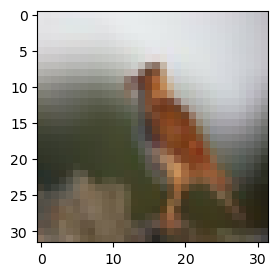

In [11]:
#Exemples d'images issues de la liste x_train_cat
plt.figure(figsize = (5, 3))
index = np.random.randint(len(x_train_cat))
plt.imshow(x_train_cat[index])

### Appliquer un masque à une image


La fonction *mask* prend 2 variables en argument: imgs est une liste d'images, et mask_size, la taille du masque que nous voulons appliquer.

Pour chaque image contenue dans la liste des images, on choisit aléatoirement une cordonnées de x et de y à partir de laquelle on veut appliquer le masque. On normalise l'image, de manière à ce que ses données soient comprises entre 0 et 1. On créer une variable **masked_img** qui est l'image avec le masque appliqué, et une variable **target** qui mémorise la partie de l'image sous le masque. Enfin, on rajoute ces variables (qui sont des listes), aux variables all_inputs, all_inputs_fl, all_targets, all_targets_fl, all_x_starts, all_y_starts. 

- imgs : liste de toutes les images originales
- all_inupts: liste de liste contenant toutes les images masquées
- all_inputs_fl : liste contenant toutes les données des images masquées, qui ont étaient aplaties (flattening)
- all_targets : liste de liste contenant toutes les régions concernées sous les masques
- all_targets_fl : liste contenant toutes les données des régions concernées qui ont été aplaties 
- all_x_starts : liste de liste de toutes les coordonnées des x de là où commence le masque pour chaque image
- all_y_starts : liste de liste de toutes les coordonnées des y de là où commence le masque pour chaque image


In [12]:
images, masked, masked_fl, target, target_fl, x, y = mask(x_train_cat, 3)

<Figure size 500x300 with 0 Axes>

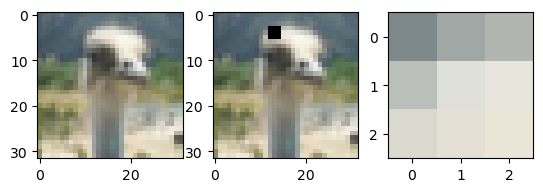

In [13]:
#Visualisation des résultats
plt.figure(figsize = (5, 3))
fig, axes = plt.subplots(1, 3)
index = np.random.randint(len(images))
axes[0].imshow(images[index])
axes[1].imshow(masked[index])
axes[2].imshow(target[index])



### Visualiser nos résultats

On créer également une fonction *visualization* qui permet de visualiser nos résultats, c'est-à-dire, de comparer l'image original, l'image avec masque, la région de l'image masquée, la région de l'image prédite, et l'image entière prédite, de toutes nos images contenues dans la listes "images".

La fonction *visualization_mask* prend en argument 7 variables: 
- imgs : une liste de liste contenant toutes les images originales
- masked : une liste de liste contenant toutes les images avec masque
- target : une liste de liste contenant toutes les régions des images sous les 
- predicted : la prédiction de notre image après être passée par notre neural network
- x et y : une liste de liste de toutes les coordonnées du point de départ de là où se situe nos masques
- mask_size : la taille du masque

Afin d'afficher la régio prédite (pred_region), on la reshape dans le bon format, de mask_size * mask_size * 3 car il y a trois données pour chacun des pixels 

### Fonction __ name __ == __ main __

C'est dans cette fonction bien précise que va s'enchainer logiquement ce que notre programme devra faire

#### **A: Pour les données d'entrainements** 
##### 1) On séléctionne nos données d'une catégorie précise

On fait appel à la fonction *choose_category* pour choisir toutes les images correspondantes à la catégorie souhaitée parmis la liste des *x_train* images. On appelle *x_train_cat* la liste de ces images et *y_train_cat*, une liste d'entiers de la même longueur attribuée à chacune des images.

##### 2) On applique un masque aux images de cette liste 

On fait appel à la fonction *mask()* pour masquer les images de la liste *x_train_cat*. On appelle les variables ressortant *x_train_mask* et *y_train_mask*, qui sont toutes les deux des np array

#### **B: Pour les données de tests** 
##### 1) On séléctionne nos données d'une catégorie précise

On fait appel à la fonction *choose_category* pour choisir toutes les images correspondantes à la catégorie souhaitée parmis la liste des *x_test* images. On appelle *x_test_cat* la liste de ces images. On raccourci la liste de maximum 1000 éléments (*max_img*) our éviter d'avoir des entrainements trop long. 

##### 2) On applique un masque aux images de cette liste 

On fait appel à la fonction *mask()* pour masquer les images de la liste *x_test_cat*. On appelle les variables ressortant *x_test_mask* et *y_test_mask*, qui sont toutes les deux des np array

#### **C: Faire appel à notre NN**

On détermine la *input_size* qui correspond à la taille des données d'entrées, ce qui est ici, une image. Donc, comme nous avons des images de 32 pixels x 32 pixels, et comme chaque pixels a trois données (R, G, B), alors

input_size = 32 x 32 x 3

De même nous voulons recevoir en sortie, une image de la taille de la target region, donc 

output_size = mask_size x mask_size x 3

On sépare nos données d'entrainement, en donné d'entrainement et données de validation, pour entrainer le modèle avant de la faire prédire les *x_test_mask*

Enfin, on appel notre NN avec la commande ' model = NN(input_size, hidden_size, output_size, learning_rate=0.001)', et on détermine la loss. Enfin, on l'affiche sur un graphe, avant de déterminer la variable y_pred et d'afficher la prédiction. 

### Comparaison avec un model trouvé sur internet qui fonctionne 